Name: Joshua Olando, Anthony Vo and Samantha Zygmont

Course: IST 707

Date: 30 November 2024

Supporting Data for Final Project

#1. Collecting the Data

The data set for our project is titled "Chronic Kidney Disease" from the UC Irvine Machine Learning Repository (url: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease).

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# Remove whitespace
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].str.strip()

for column in y.columns:
    if y[column].dtype == 'object':
        y[column] = y[column].str.strip()

<ipython-input-2-e708533cc8ab>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].str.strip()
<ipython-input-2-e708533cc8ab>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[column] = y[column].str.strip()


#2. Exploring the data

In [3]:
# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

**Column Descriptions**

Numerical Features:
1. Age: The age of the individual
2. Blood Pressure (bp): The pressure of the blood in the arteries (120/80 mmHg)
3. Blood Glucose Random (bgr): The concentration of glucose in the bloodstream
4. Blood Urea (bu): The concentration of urea nitrogen in the blood
5. Serum Creatinine (sc): The concentration of creatinine in the blood
6. Sodium (sod): The concentration of sodium in the blood
7. Potassium (pot): The concentration of potassium in the blood
8. Hemoglobin (hemo): The level of hemoglobin in the blood (carries oxygen from the lungs to the rest of the body)
9. Packed Cell Volume (pcv): The proportion of blood volume that is occupied by red blood cells (indicates blood's oxygen-carrying capacity)
10. White Blood Cell Count (wbcc): The count of white blood cells in the blood (body's immunity)
11. Red Blood Cell Count (rbcc): The number of red blood cells in the blood (carries oxygen throughout the body)
12. Specific Gravity (sg): A measure of the concentration of urine
13. Albumin (al): A protein found in the blood
14. Sugar (su): Indicates the presence or absence of sugar in the urine


Categorical Features:
15. Red Blood Cells (rbc): The presence of red blood cells in the urine
16. Pus Cell (pc): The presence of pus cells in the urine
17. Pus Cell Clumps (pcc): The presence of clumps of pus cells in the urine
18. Bacteria (ba): The presence of bacteria in the urine
19. Hypertension (htn): Whether the individual has high blood pressure
20. Diabetes Mellitus (dm): Whether the individual has diabetes
21. Coronary Artery Disease (cad): Whether the individual has coronary artery disease
22. Appetite (appet): The individual’s reported level of appetite
23. Pedal Edema (pe): Whether the individual has swelling in the feet and ankles
24. Anemia (ane): Whether the individual has anemia


Target Variable (categorical variable):
25. Class: The target variable indicating the presence or absence of chronic kidney disease, where "ckd" indicates the individual has chronic kidney disease, and "notckd" indicates they do not

First, we merged the data into one data frame so that the X variables and y variable (class) was all in the same data frame. To do so we used the merge function to merge both pandas data frames.

In [4]:
import pandas as pd

#use merge to combine X and y into one data frame df
df = pd.merge(X, y, left_index=True, right_index=True)

#use .info() to see total entries and non-null entries in each column.
df.info()

#use .desribe() to calculate some descriptive statistics on columns with numeric values.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


**Examine Distributions**

**Histograms of the Numerical Predictor Columns**

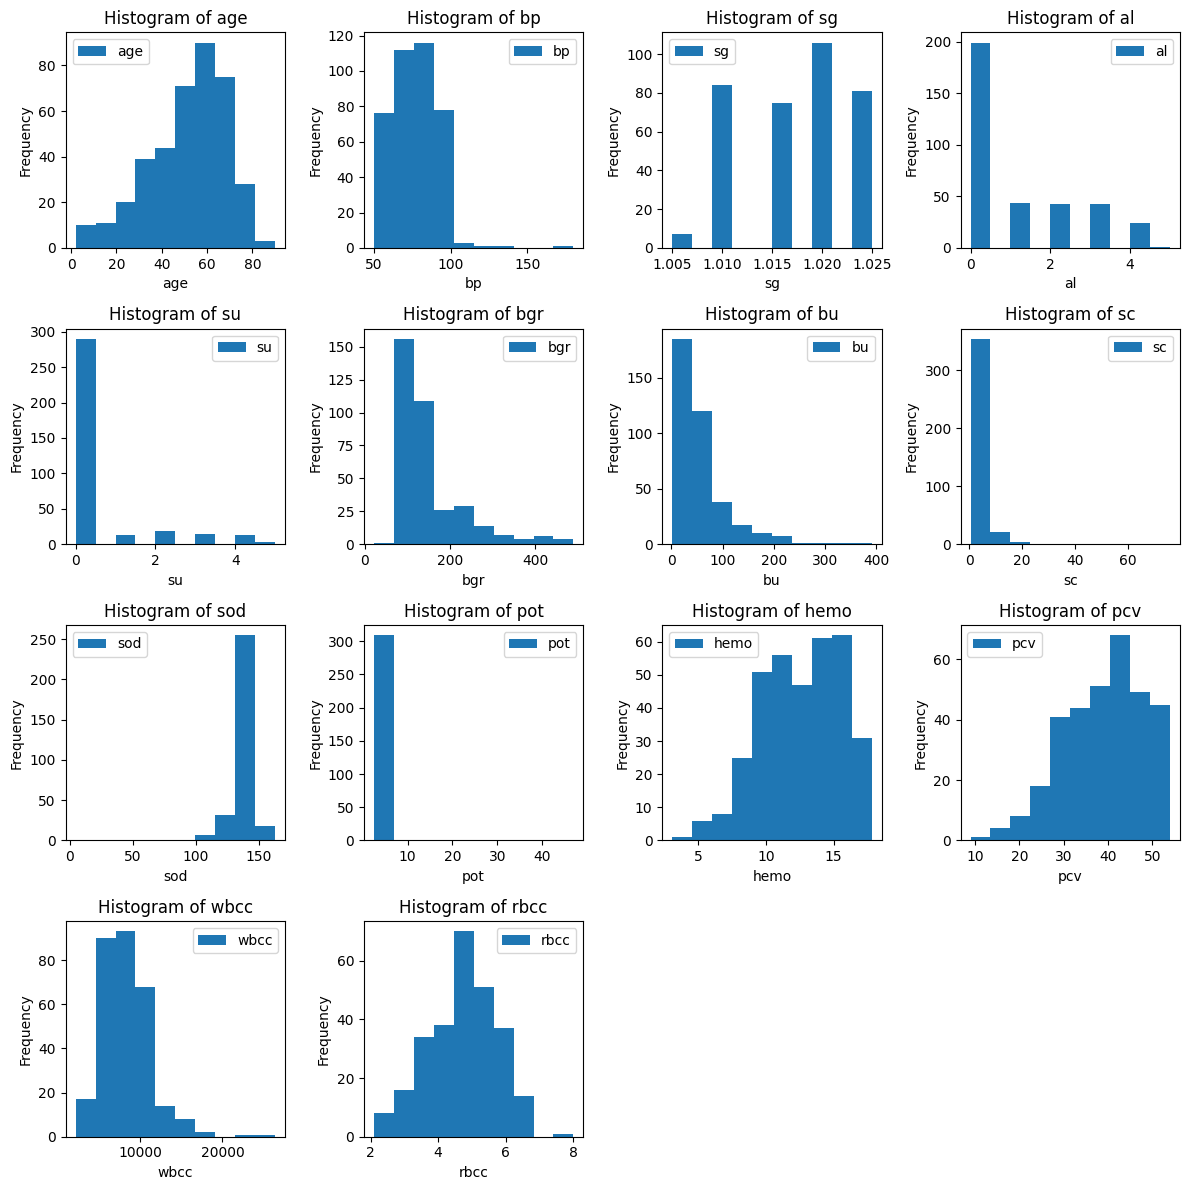

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Numerical columns from the DataFrame for creating a histogram
df_num = df.select_dtypes(include=np.number)

# Create a figure and axes objects with desired layout
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical columns and plot histograms
for i, column in enumerate(df_num.columns):
    axes[i].hist(df_num[column].dropna(), bins=10, label=column)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Hide any empty subplots
for i in range(len(df_num.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Boxplots of the Numerical Predictor Variables**

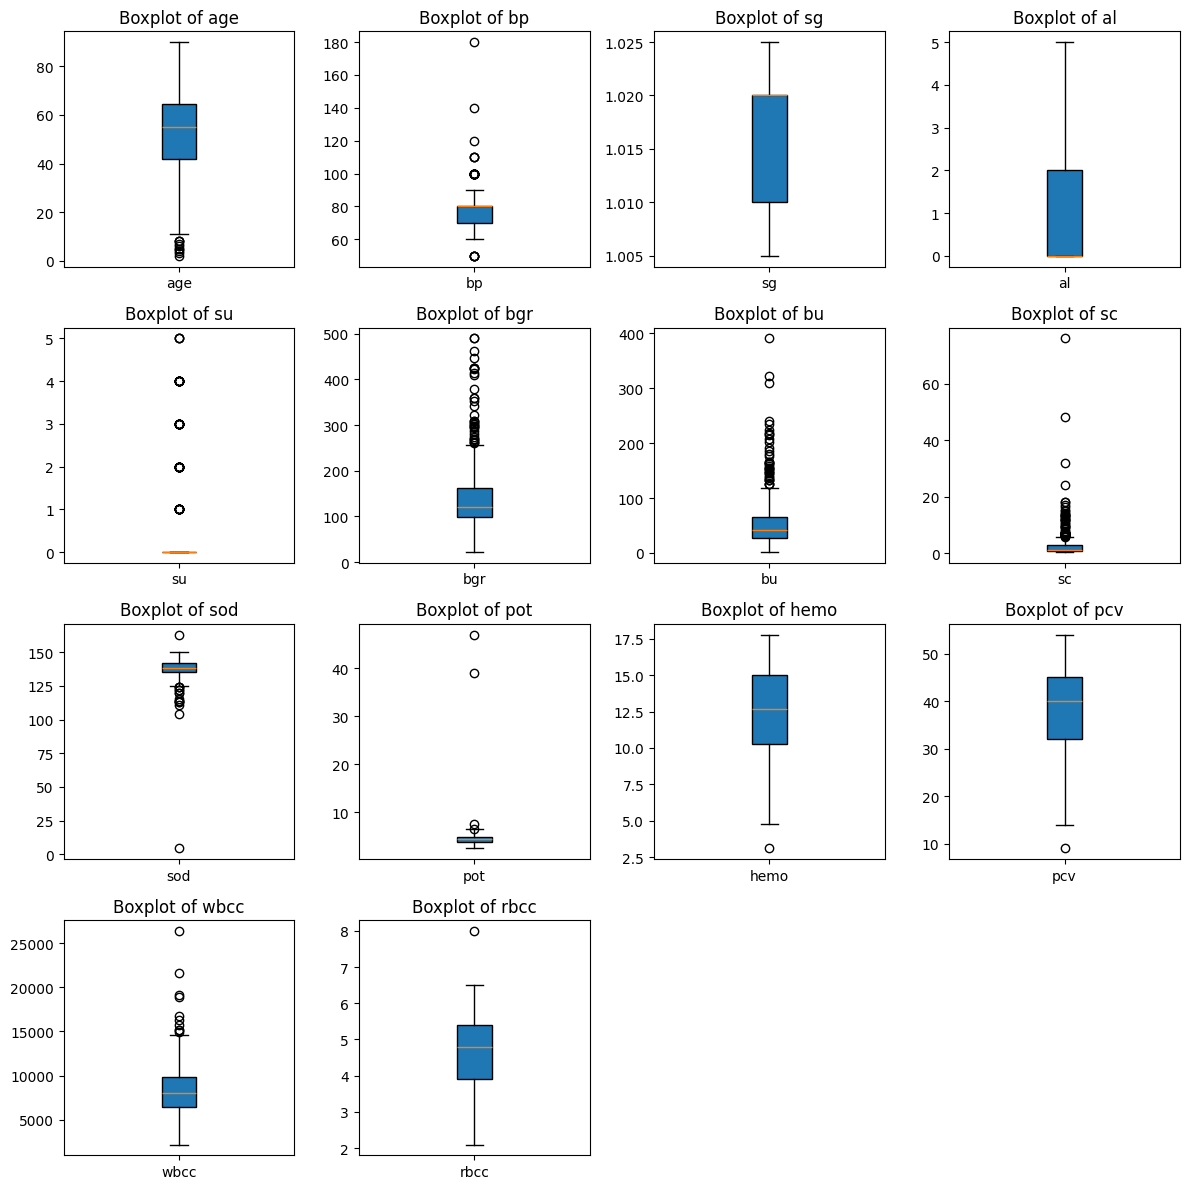

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # Adjust figsize for size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical columns and plot boxplots
for i, column in enumerate(df_num.columns):
    axes[i].boxplot(df_num[column].dropna(), patch_artist=True, labels=[column])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any empty subplots
for i in range(len(df_num.columns), len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Distribution of Individuals with and without Chronic Kidney Disease**

Based on the distribution there is a higher frequency of individuals with chronic kidney disases than individuals without chronic kidney disease. There is a count of about 250 individuals with chronic kidney disease and 150 individuals without chronic kidney disease.

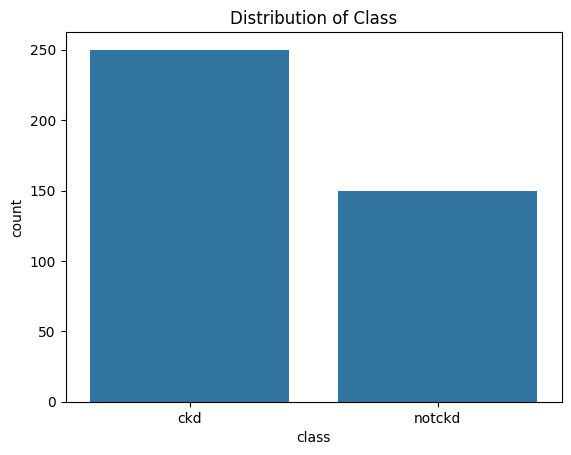

In [7]:
#find distribution of "class" for entire data frame
sns.countplot(x='class', data=df)
plt.title('Distribution of Class')
plt.show()

**Distribution of Age with Individuals with and without Chronic Kidney Disease**

Based on the distribution plots below, it appears that individuals with chronic kidney disease tends to be more prevalent in older individuals, with a noticeable shift in the age of onset compared to those without the disease. The data for ckd is centered around age 60 and the data for notckd is centered around age 45. However, there were younger individuals with ckd, indicating that it can be present at any age but shows more prevalence in older adults in this data set.

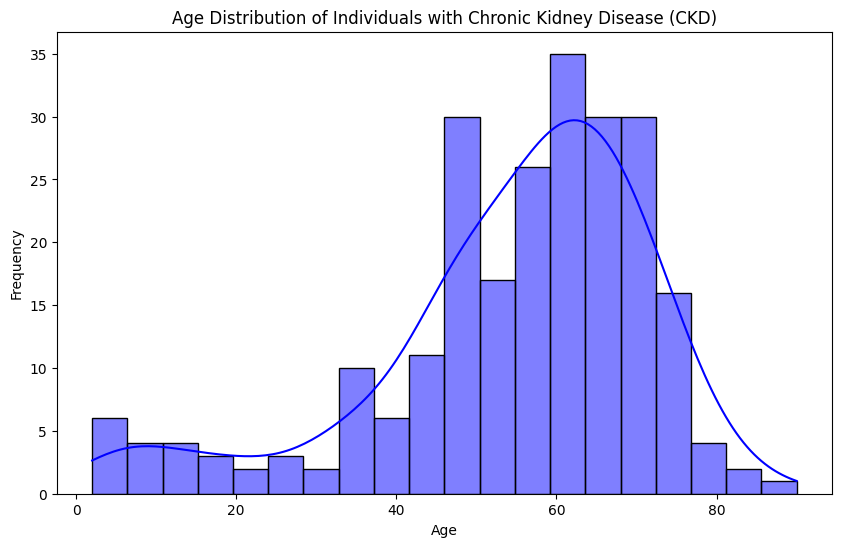

In [8]:
# Filter for individuals with chronic kidney disease
df_ckd = df[df['class'] == 'ckd']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_ckd['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Individuals with Chronic Kidney Disease (CKD)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

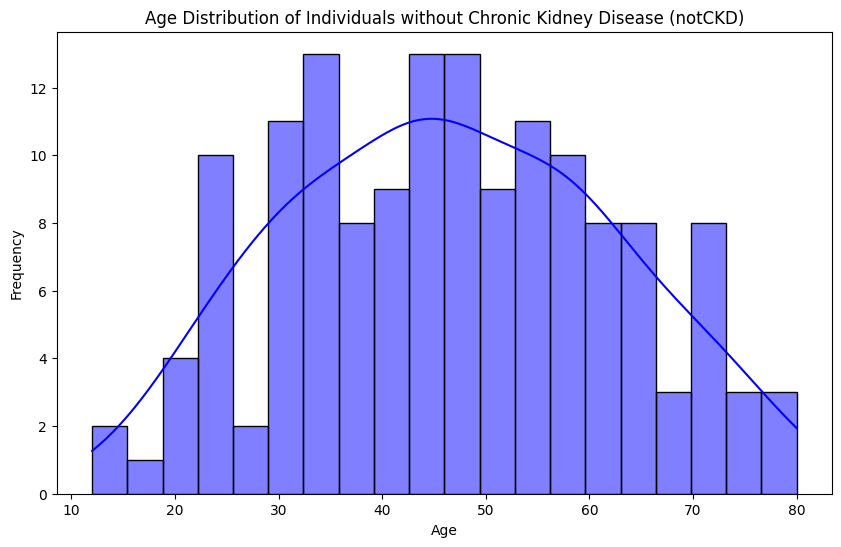

In [9]:
# Filter for individuals without chronic kidney disease
df_ckd = df[df['class'] == 'notckd']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_ckd['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Individuals without Chronic Kidney Disease (notCKD)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

**Examine Correlations**

Correlation Matrix was plotted for all the numerical varaibles in the data set to see if there were any visible correlations between some of the variables. There were no clear correlations illustrated in these plots, so we opted to calculate the correlations to see if there were any strong correlations that were not clear visually.

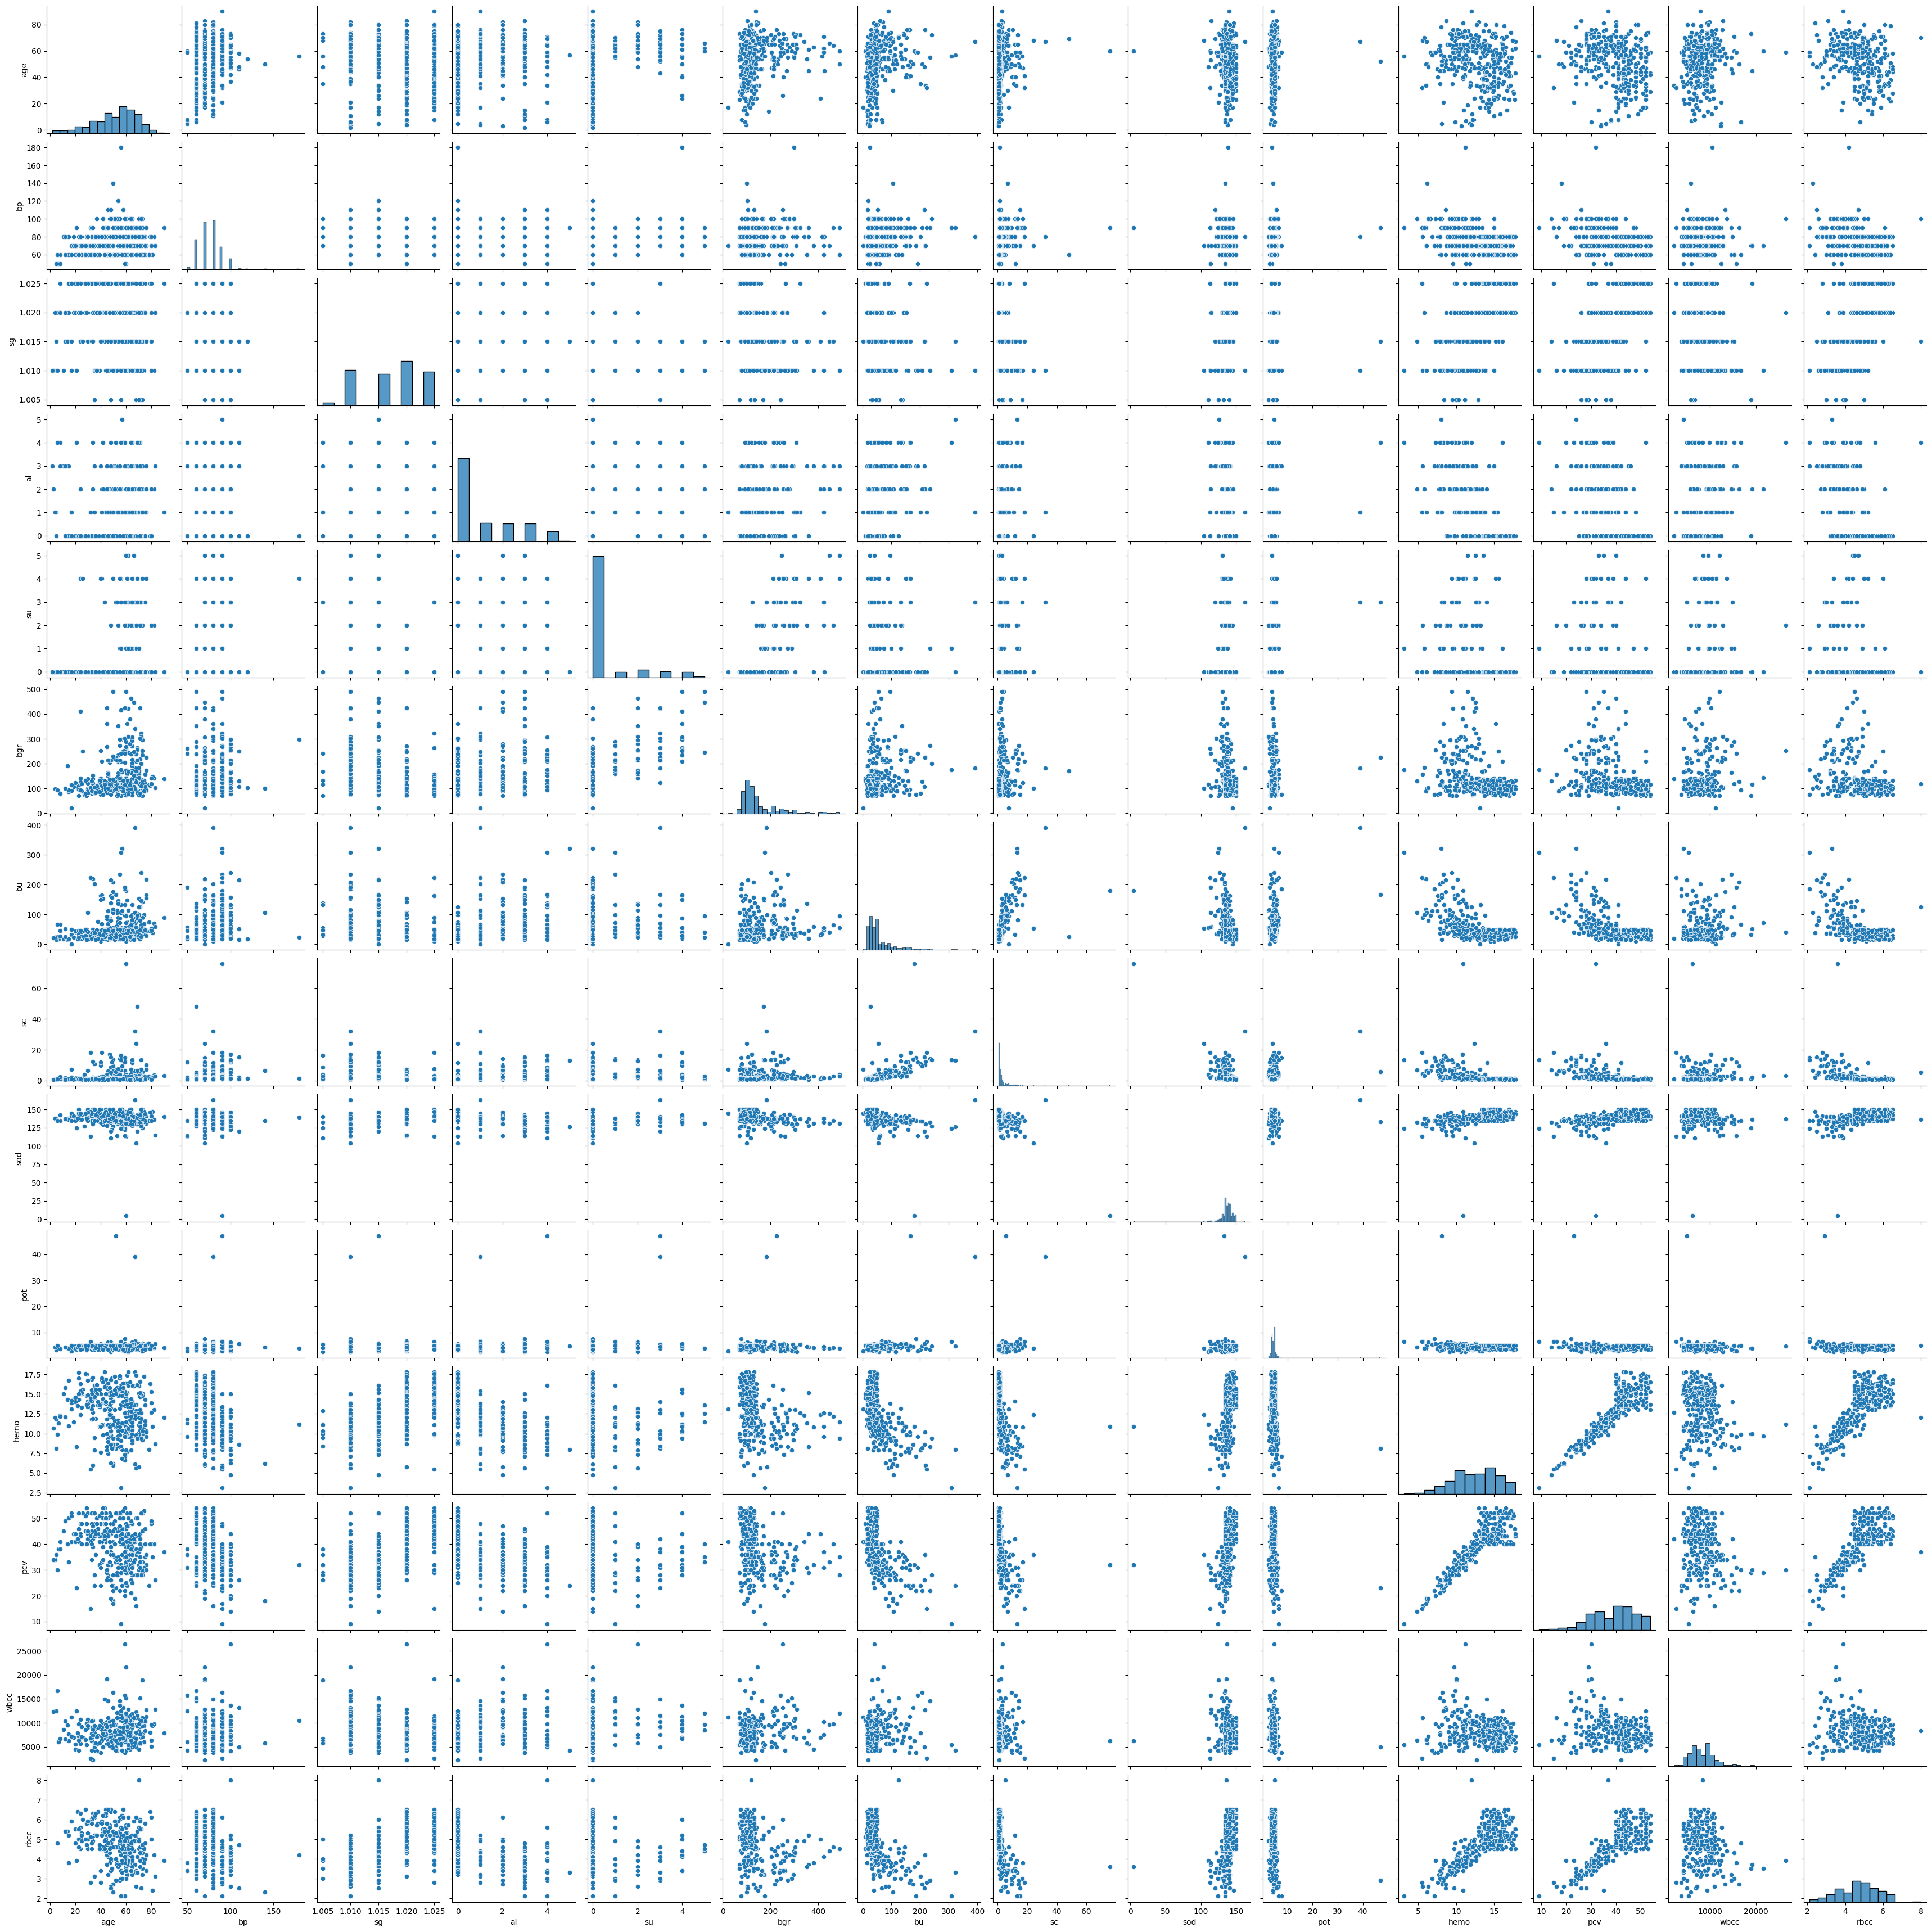

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#select the columns containing numeric values
numeric_columns = df.select_dtypes(include=['number'])

#create a scatter plot matrix using seaborn and matplotlib
sns.pairplot(numeric_columns)
plt.show()

Create a Heat Map

Numerical columns are:  ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']


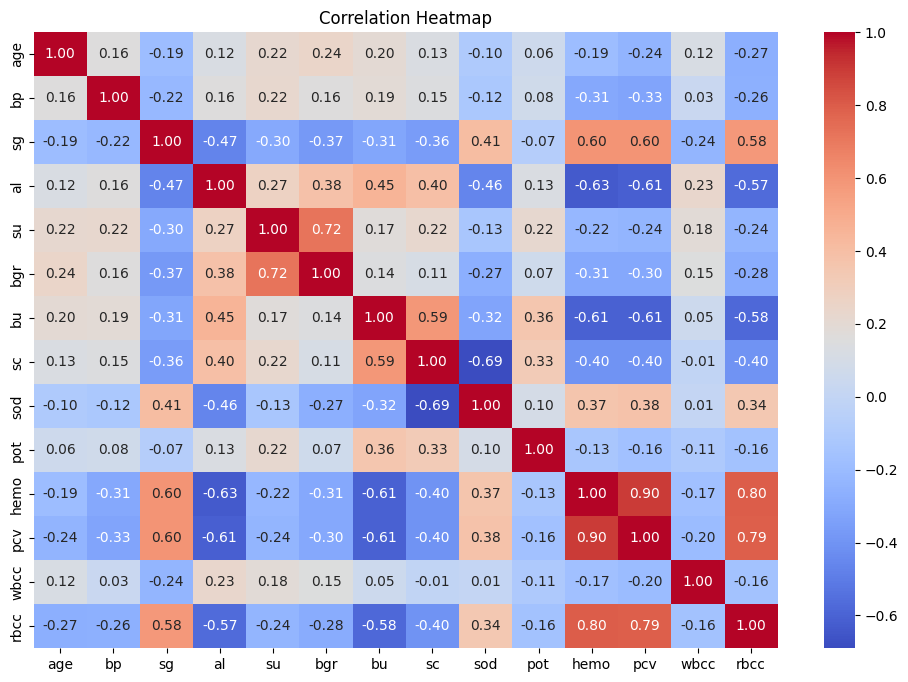

In [11]:
numerical_columns = [col for col in df.columns if df[col].dtype=='float64']
print('Numerical columns are: ', numerical_columns)

# Plot correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


There were some stronger correlations based on the outputs.

su (sugar) & bgr (blood glucose random) 0.717827 (moderate to strong positive correlation)

hemo (hemoglobin) & al (albumin) -0.634632 (moderate negative correlation)

sc (serum creatinine) & bu (blood urea) 0.586368 (moderate positive correlation)

hemo (hemoglobin) & bu (blood urea) -0.610360 (moderate negative correlation)

sg (specific gravity) & rbcc 0.579476 (moderate positive correlation)


**Descriptive Statistics on Numeric Variables**

There was some important data determined from this that give a better idea of the average values for each of these variables, and the range of the variables.

**Age**
- average = ~51
- age ranges from 2 to 90

**Blood Pressue**
- average = ~76
- blood pressure range from 50 to 180

**Specific Gravity**
- average = ~1.02
- specific gravity range from 1.005 to 1.025

**Albumin**
- average = ~1.02
- albumin range from 0 to 5

**Sugar**
- average = ~0.45
- sugar range from 0 to 5

**Blood Glucose Random**
- average = ~148
- blood glucose random range from 22 to 490

**Blood Urea**
- average = ~57.4
- blood urea range from 1.5 to 391

**Serum Creatinine**
- average = ~3.07
- serum creatinine range from 0.4 to 76

**Sodium**
- average = ~137.5
- sodium range 4.5 to 163

**Potassium**
- average = ~4.62
- potassium range 2.5 to 47

**Hemoglobin**
- average = ~12.5
- hemoglobin range from 3.1 to 17.8

**Packed Cell Volume**
- average = ~38.88
- packed cell volume range from 9 to 54

**White Blood Cell Count**
- average = ~8406.12
- white blood cell count range 2200 to 26400

**Red Blood Cell Count**
- average = ~4.71
- red blood cell count range 2.1 to 8

In [13]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#3. Preprocessing

##a. Check for Outliers

In [14]:
# Show number of outliers in numeric data
for predictor in df_num:
    Q1 = df[predictor].quantile(0.25)
    Q3 = df[predictor].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    num_outliers = df[(df[predictor] < lb) | (df[predictor] > ub)].shape[0]
    print(f'Number of outliers for {predictor}: {num_outliers}')



Number of outliers for age: 10
Number of outliers for bp: 36
Number of outliers for sg: 0
Number of outliers for al: 0
Number of outliers for su: 61
Number of outliers for bgr: 34
Number of outliers for bu: 38
Number of outliers for sc: 51
Number of outliers for sod: 16
Number of outliers for pot: 4
Number of outliers for hemo: 1
Number of outliers for pcv: 1
Number of outliers for wbcc: 10
Number of outliers for rbcc: 1


##b. Create Pipeline

Creating a pipeline to prevent data leakage since we will have to spilt the data into training and test sets. First part of the pipeline is to split the data set by numerical and categorical.

Preprocessing the numerical data, we'll use winsorize to handle outliers, KNNImputer to fill in the null values, and MinMaxScaler to scale the data. Next, to preprocess the categorical data, we'll use SimpleImputer with the most frequent values and LabelEncoder to encode.

We'll build the rest of the pipeline in the next section since we're using multiple machine learning techniques when we use cross-validation.

In [15]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats.mstats import winsorize

numerical_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

def numerical_transform(X):
    X_num = X[numerical_features]
    X_num = X_num.apply(lambda col: winsorize(col, limits=[0.05, 0.05]))
    imputer = KNNImputer(n_neighbors=5)
    X_num = imputer.fit_transform(X_num)
    scaler = MinMaxScaler()
    X_num = scaler.fit_transform(X_num)
    return pd.DataFrame(X_num, columns=numerical_features, index=X.index)  # Use original index

def categorical_transform(X):
    X_cat = X[categorical_features]
    imputer = SimpleImputer(strategy='most_frequent')
    X_cat = imputer.fit_transform(X_cat)
    X_cat = pd.DataFrame(X_cat, columns=categorical_features, index=X.index)  # Use original index
    X_cat = pd.DataFrame({col: LabelEncoder().fit_transform(X_cat[col]) for col in X_cat.columns}, index=X.index)  # Use original index
    return X_cat


numerical_transformer = FunctionTransformer(numerical_transform, validate=False)
categorical_transformer = FunctionTransformer(categorical_transform, validate=False)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

#4. Model Development and Evaluation

##a. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

# Split data
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline for Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=3000)),
])

# Fit the pipeline and evaluate
pipeline_lr.fit(X_train, y_train)
scores_lr = cross_val_score(pipeline_lr, X, y, cv=5, scoring='f1_macro', error_score='raise')

print("Cross-validation F1 scores:", scores_lr)
print("Average cross-validation F1 score:", scores_lr.mean())

Cross-validation F1 scores: [1.         0.98675277 0.96072656 0.96072656 0.94791667]
Average cross-validation F1 score: 0.9712245115268185


##b. Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

np.random.seed(42)

# Create pipeline for Decision Tree Classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42)),
])

# Fit the pipeline and evaluate
pipeline_dt.fit(X_train, y_train)

# Using StratifiedKFold to maintain class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_dt = cross_val_score(pipeline_dt, X, y, cv=cv, scoring='f1_macro', error_score='raise')
print("Cross-validation F1 scores (Decision Tree):", scores_dt)
print("Average cross-validation F1 score (Decision Tree):", scores_dt.mean())

Cross-validation F1 scores (Decision Tree): [0.97333333 0.921875   0.89684075 0.9729547  0.97333333]
Average cross-validation F1 score (Decision Tree): 0.9476674227384544


##c. SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier

np.random.seed(42)

# Create pipeline for SGD Classifier
pipeline_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42)),
])

# Fit the pipeline and evaluate
pipeline_sgd.fit(X_train, y_train)

# Using StratifiedKFold to maintain class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_sgd = cross_val_score(pipeline_sgd, X, y, cv=cv, scoring='f1_macro', error_score='raise')

print("Cross-validation F1 scores (SGD):", scores_sgd)
print("Average cross-validation F1 score (SGD):", scores_sgd.mean())

Cross-validation F1 scores (SGD): [0.96072656 0.98675277 0.96072656 1.         0.98657493]
Average cross-validation F1 score (SGD): 0.9789561639293467


## d. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create pipeline for Random Forest Classifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)),
])

# Fit the pipeline and evaluate
pipeline_rf.fit(X_train, y_train)

#model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Using StratifiedKFold to maintain class distribution in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_rf = cross_val_score(pipeline_rf, X, y, cv=cv, scoring='f1_macro', error_score='raise')

print("Cross-validation F1 scores (Random Forest):", scores_rf)
print("Average cross-validation F1 score (Random Forest):", scores_rf.mean())

Cross-validation F1 scores (Random Forest): [0.97333333 1.         0.97333333 0.93073593 0.98657493]
Average cross-validation F1 score (Random Forest): 0.9727955052163813


##e. Visual Summary

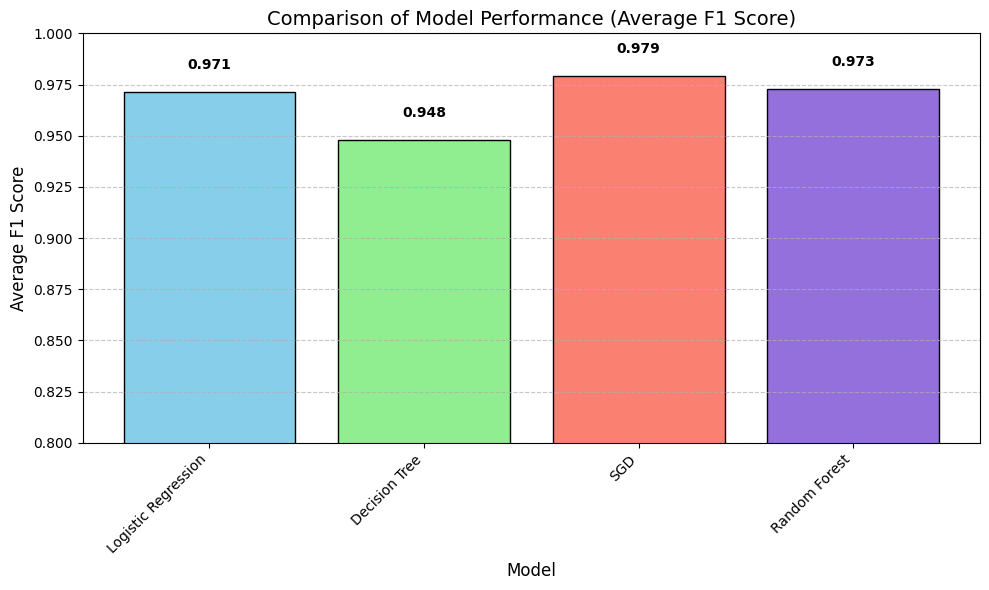

In [20]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

model_names = ['Logistic Regression', 'Decision Tree', 'SGD', 'Random Forest']
model_scores = [scores_lr.mean(), scores_dt.mean(), scores_sgd.mean(), scores_rf.mean()]

colors = ['skyblue', 'lightgreen', 'salmon', 'mediumpurple']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, model_scores, color=colors, edgecolor='black')

for bar, score in zip(bars, model_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Comparison of Model Performance (Average F1 Score)', fontsize=14)
plt.ylabel('Average F1 Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#5. Tuning Hyperparameters

##a. Tuning Logistic Regression

In [21]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']  # Solvers that support l1 penalty
}

# Create GridSearchCV object
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1_macro')

# Fit to the training data
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and score
print("Best hyperparameters:", grid_search_lr.best_params_)
print("Best F1 score:", grid_search_lr.best_score_)

Best hyperparameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best F1 score: 0.9867672086095659


##b. Tuning Decision Tree Classifier

In [22]:
np.random.seed(42)

# Define the hyperparameter grid for Decision Tree
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],  # Explore different depths
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Create GridSearchCV object
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro')

# Fit to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and score
print("Best hyperparameters:", grid_search_dt.best_params_)
print("Best F1 score:", grid_search_dt.best_score_)

Best hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best F1 score: 0.897535999993395


After running the grid search we see that the F1 score goes down, which suggests that there is overfitting by applying additional hyperparameters opposed to the initial model which was much simpler.

##c. Tuning for SGD Classifier

In [23]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Define the hyperparameter grid for SGD Classifier
param_grid_sgd = {
    'classifier__loss': ['hinge', 'log_loss', 'perceptron'],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'classifier__max_iter': [1000, 2000, 3000]
}

# Create GridSearchCV object
grid_search_sgd = GridSearchCV(pipeline_sgd, param_grid_sgd, cv=5, scoring='f1_macro', n_jobs=-1)  # n_jobs=-1 for parallel processing

# Fit to the training data
grid_search_sgd.fit(X_train, y_train)

# Get the best hyperparameters and score
print("Best hyperparameters (SGD):", grid_search_sgd.best_params_)
print("Best F1 score (SGD):", grid_search_sgd.best_score_)

Best hyperparameters (SGD): {'classifier__alpha': 0.0001, 'classifier__loss': 'hinge', 'classifier__max_iter': 1000, 'classifier__penalty': 'l2'}
Best F1 score (SGD): 0.9900716478005298


##d. Tuning for Random Forest Classifier

In [24]:
np.random.seed(42)

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and score
print("Best hyperparameters (Random Forest):", grid_search_rf.best_params_)
print("Best F1 score (Random Forest):", grid_search_rf.best_score_)

Best hyperparameters (Random Forest): {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best F1 score (Random Forest): 0.9799400117948845


# e. Summary of Accuracies with Tuned Parameters

Logistic Regression

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

np.random.seed(42)

# Logistic Regression with the best parameters
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=3000)),
])

pipeline_lr.fit(X_train, y_train)

y_pred = pipeline_lr.predict(X_test)

# Model's test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy_test}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation accuracy
accuracy_cv = cross_val_score(pipeline_lr, X, y, cv=cv, scoring='accuracy')

# Print results
print(f"Cross-Validation Accuracy: {accuracy_cv.mean()}")
print("Cross-Validation Best F1 score:", grid_search_lr.best_score_)

Test Accuracy: 0.975
Cross-Validation Accuracy: 0.9675
Cross-Validation Best F1 score: 0.9867672086095659


Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

np.random.seed(42)

# Decision Tree Classifier with the best parameters
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=10,
        random_state=42
    )),
])

pipeline_dt.fit(X_train, y_train)

y_pred = pipeline_dt.predict(X_test)

# Model's test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy_test}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation accuracy
accuracy_cv = cross_val_score(pipeline_dt, X, y, cv=cv, scoring='accuracy')

# Print results
print(f"Cross-Validation Accuracy: {accuracy_cv.mean()}")
print("Cross-Validation Best F1 score:", grid_search_dt.best_score_)

Test Accuracy: 0.975
Cross-Validation Accuracy: 0.9649999999999999
Cross-Validation Best F1 score: 0.897535999993395


SGD Classifier

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

np.random.seed(42)

# SGD Classifier with the best hyperparameters
pipeline_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(alpha=0.0001, loss='hinge', penalty='l2', max_iter=1000, random_state=42)),
])

pipeline_sgd.fit(X_train, y_train)

y_pred = pipeline_sgd.predict(X_test)

# Model's test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy_test}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation accuracy
accuracy_cv = cross_val_score(pipeline_sgd, X, y, cv=cv, scoring='accuracy')

# Print Results
print(f"Cross-validation Accuracy: {accuracy_cv.mean()}")
print("Cross-validation Best F1 score:", grid_search_sgd.best_score_)

Test Accuracy: 0.9875
Cross-validation Accuracy: 0.9800000000000001
Cross-validation Best F1 score: 0.9900716478005298


Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

np.random.seed(42)

# Random Forest with the best hyperparameters
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=5,
        random_state=42
    )),
])

pipeline_rf.fit(X_train, y_train)

y_pred = pipeline_rf.predict(X_test)

# Model's test accuracy
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy_test}")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation accuracy
accuracy_cv = cross_val_score(pipeline_rf, X, y, cv=cv, scoring='accuracy')

# Print results
print(f"Cross-validation Accuracy: {accuracy_cv.mean()}")
print("Cross-validation Best F1 score:", grid_search_rf.best_score_)


Test Accuracy: 0.975
Cross-validation Accuracy: 0.9725000000000001
Cross-validation Best F1 score: 0.9799400117948845


#6. Summary Comparison

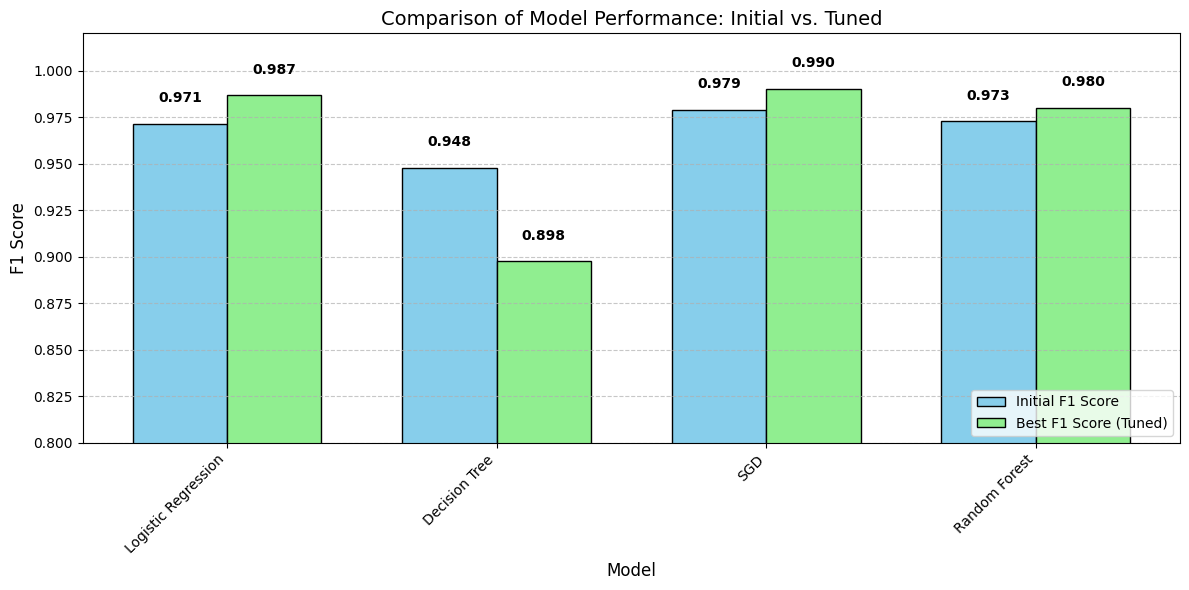

In [29]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

best_f1_scores = [
    grid_search_lr.best_score_,  # Logistic Regression
    grid_search_dt.best_score_,  # Decision Tree
    grid_search_sgd.best_score_, # SGD Classifier
    grid_search_rf.best_score_   # Random Forest
]

model_names = ['Logistic Regression', 'Decision Tree', 'SGD', 'Random Forest']
initial_f1_scores = [scores_lr.mean(), scores_dt.mean(), scores_sgd.mean(), scores_rf.mean()]  # Initial scores
best_f1_scores = [grid_search_lr.best_score_, grid_search_dt.best_score_, grid_search_sgd.best_score_, grid_search_rf.best_score_]  # Best scores after tuning

# Bar positions
bar_width = 0.35
index = np.arange(len(model_names))

plt.figure(figsize=(12, 6))  # Increase width for better readability

# Bars for initial and best F1 scores
bars1 = plt.bar(index, initial_f1_scores, bar_width, label='Initial F1 Score', color='skyblue', edgecolor='black')
bars2 = plt.bar(index + bar_width, best_f1_scores, bar_width, label='Best F1 Score (Tuned)', color='lightgreen', edgecolor='black')

# Displaying scores on the bars
for bar, score in zip(bars1 + bars2, initial_f1_scores + best_f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart labels and formatting
plt.title('Comparison of Model Performance: Initial vs. Tuned', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0.8, 1.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()